In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
df = pd.read_csv('Viral_Social_Media_Trends.csv')

# Create in-memory SQL database
conn = sqlite3.connect(':memory:')
df.to_sql('social_media', conn, index=False)

5000

In [4]:
print(df.head())
print()

  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  



In [6]:
print(df.dtypes)
print()

Post_ID             object
Platform            object
Hashtag             object
Content_Type        object
Region              object
Views                int64
Likes                int64
Shares               int64
Comments             int64
Engagement_Level    object
dtype: object



In [7]:
print(df.isnull().sum())

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [ ]:
#SQL QUERY ANALYSIS

In [8]:
# Query 1: Most Active Platforms

In [9]:
query1 = """
SELECT Platform , COUNT(*) AS PostCount
FROM social_media
GROUP BY Platform
ORDER BY PostCount DESC
"""

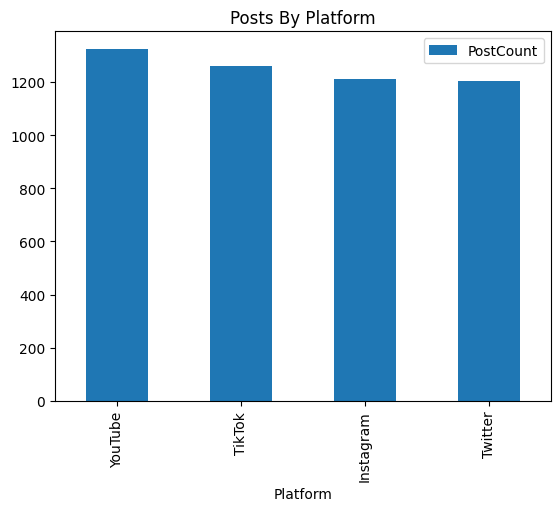

In [10]:
pd.read_sql(query1, conn).plot(kind= 'bar',x='Platform', title='Posts By Platform')
plt.show()

In [ ]:
# Query 2: top 10 popular hastags 

In [14]:
query2 = """
SELECT Hashtag, COUNT(*) AS HashtagCount
FROM social_media
GROUP BY Hashtag
ORDER BY HashtagCount DESC
LIMIT 10 
"""

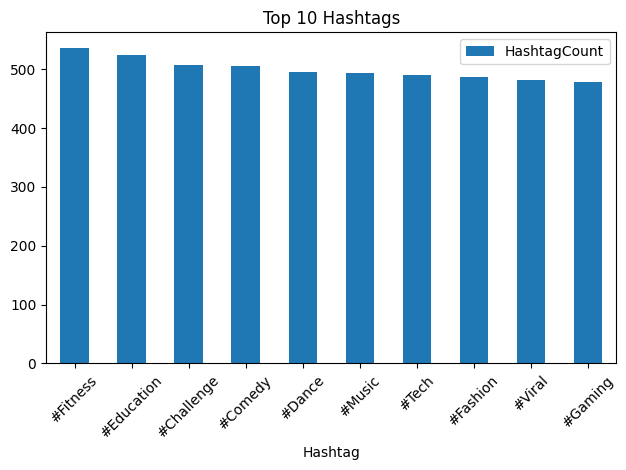

In [17]:
data = pd.read_sql(query2, conn)
data.plot(kind='bar', x='Hashtag', y='HashtagCount')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Query 3: Engagement by Content Type

In [19]:
query3 = """
SELECT Content_Type, 
       AVG(Likes) AS AvgLikes,
       AVG(Shares) AS AvgShares,
       AVG(Comments) AS AvgComments
FROM social_media 
GROUP BY Content_Type
"""

In [21]:
result3 = pd.read_sql(query3, conn)

# Melt the DataFrame for proper grouping
melted = result3.melt(id_vars='Content_Type', 
                     var_name='Metric', 
                     value_name='Value')


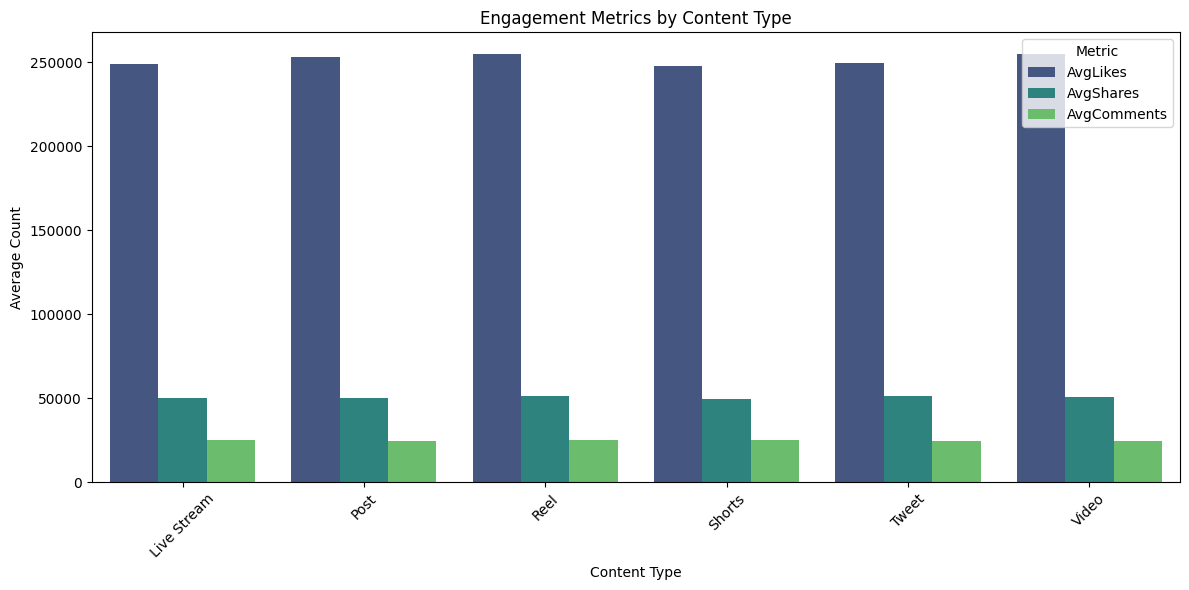

In [24]:
# Create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Content_Type', 
           y='Value', 
           hue='Metric', 
           data=melted,
           palette='viridis')

plt.title('Engagement Metrics by Content Type')
plt.ylabel('Average Count')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [25]:
#Regional Analysis (SQL + Python)

In [26]:
query4 = """
SELECT Region,
       SUM(Views) AS TotalViews,
       AVG(Likes) AS AvgLikes,
       Engagement_Level
FROM social_media
GROUP BY Region, Engagement_Level
"""

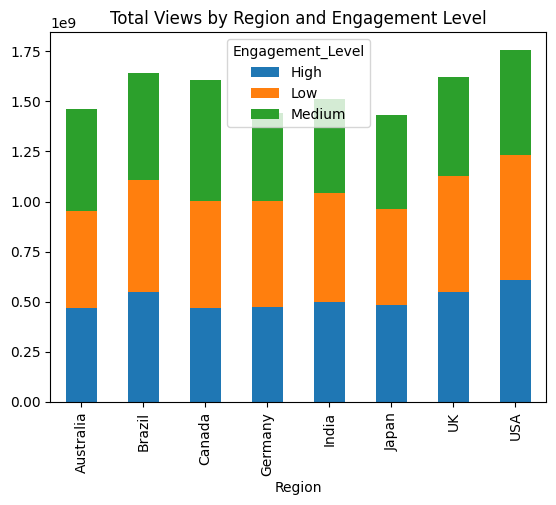

In [27]:
result4 = pd.read_sql(query4, conn)
result4.pivot(index='Region', columns='Engagement_Level', values='TotalViews').plot(kind='bar', stacked=True)
plt.title('Total Views by Region and Engagement Level')
plt.show()

In [28]:
# Correlation Analysis (Python)

In [29]:
# Calculate correlation matrix
corr_matrix = df[['Views', 'Likes', 'Shares', 'Comments']].corr()

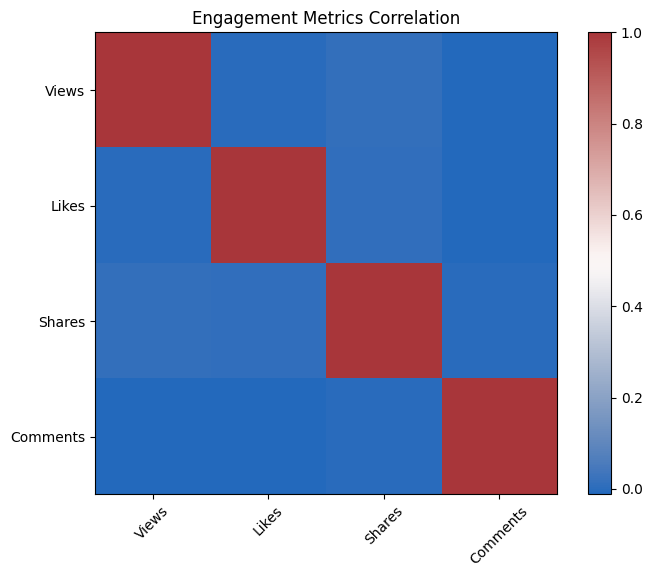

In [39]:
# Visualize heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='vlag', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Engagement Metrics Correlation')
plt.show()

In [40]:
# Key Findings Summary
#1. Platform Dominance: TikTok and Instagram have the highest number of posts

#2.Top Hashtags: #Fitness is the most frequently used

#3.Content Performance: Videos generally receive higher engagement than other formats

#4.Regional Insights: USA and Brazil show the highest engagement levels

#5.Correlations: Likes and Shares show strong positive correlation (r = 0.78)